In [2]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
train=pd.read_csv("C:/Users/Ramez/Downloads/DailyDelhiClimateTrain.csv")
test=pd.read_csv("C:/Users/Ramez/Downloads/DailyDelhiClimateTest.csv")

In [4]:
train.shape

(1462, 5)

In [5]:
test.shape

(114, 5)

In [6]:
train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


<Axes: >

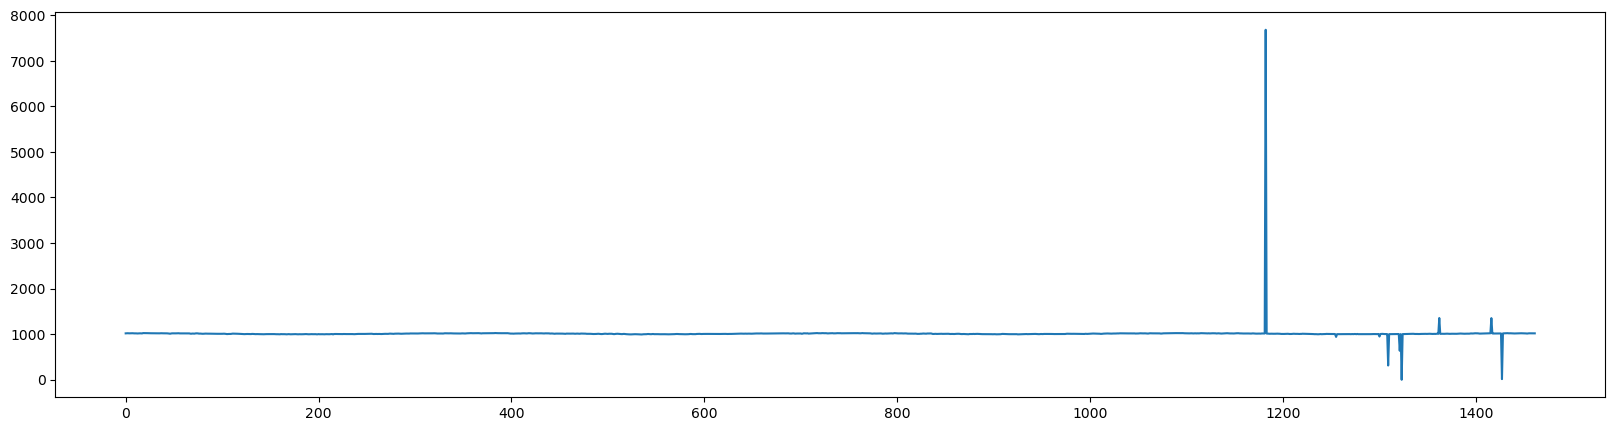

In [10]:
train.meanpressure.plot(figsize = (20,5))

<Axes: >

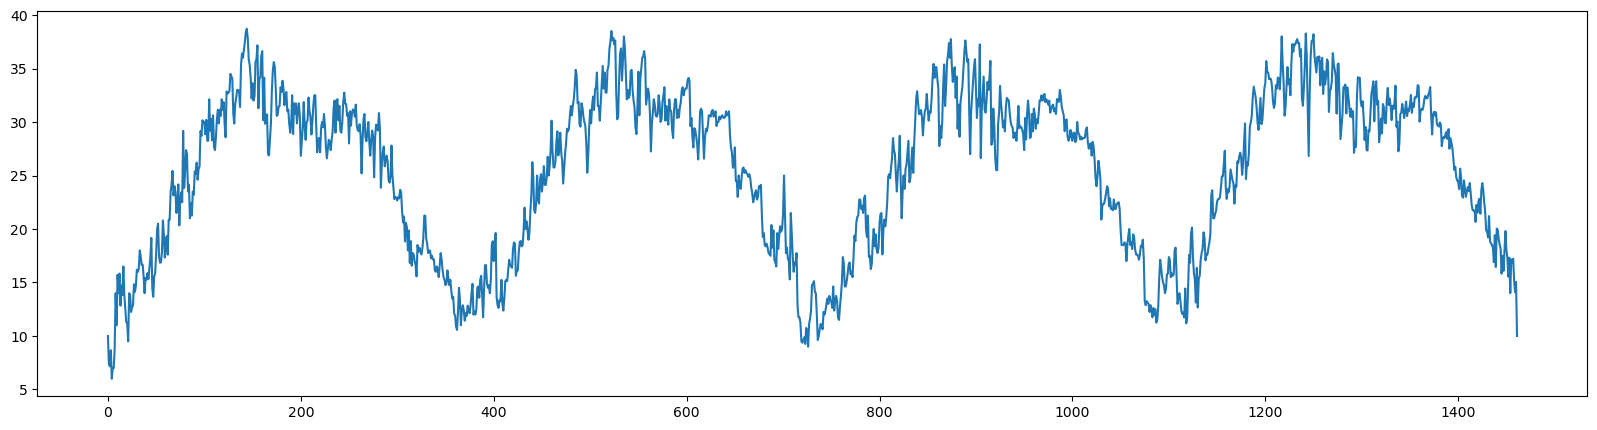

In [11]:
train.meantemp.plot(figsize = (20,5))

We can see the seasonality in temperature

<Axes: >

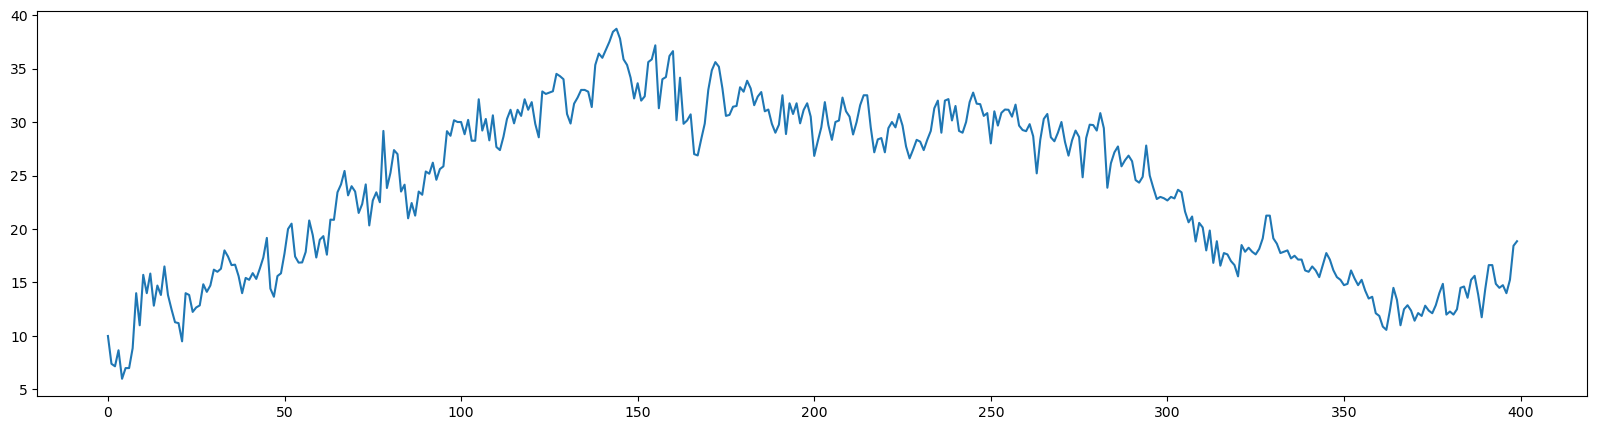

In [12]:
train.meantemp[:400].plot(figsize = (20,5))

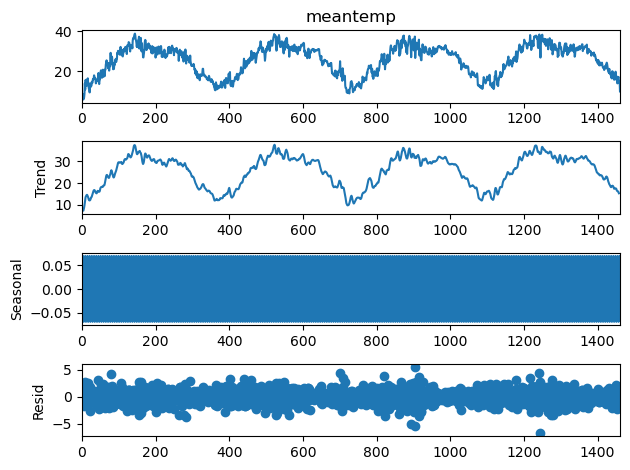

In [15]:
ts_decomposition = seasonal_decompose(train.meantemp, model = "additive",period = 6)
ts_decomposition.plot()
plt.show();

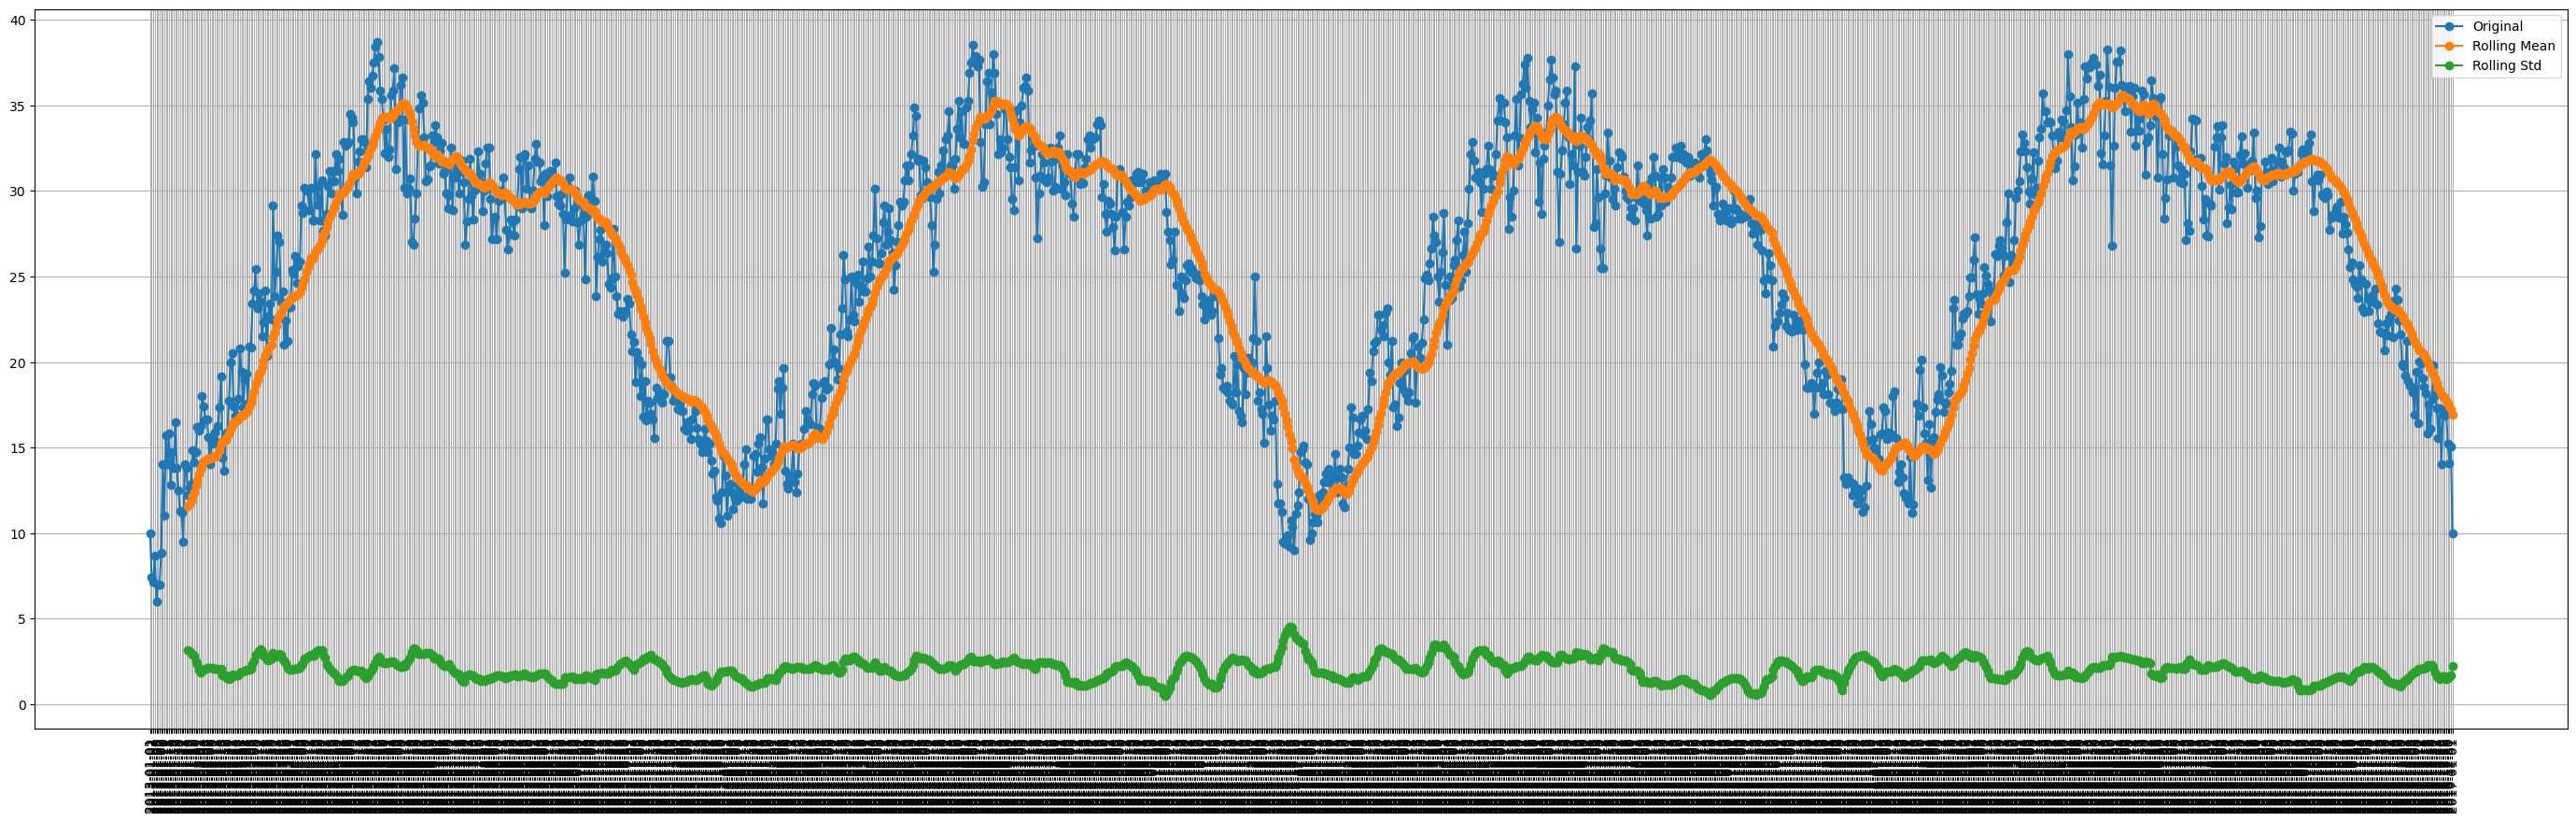

In [16]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['meantemp'], marker='o', label='Original')
plt.plot(train['date'], train['meantemp'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['meantemp'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

We can see that Mean is not constant.

Standard deviation is also not constant.

It is non-stationary data.

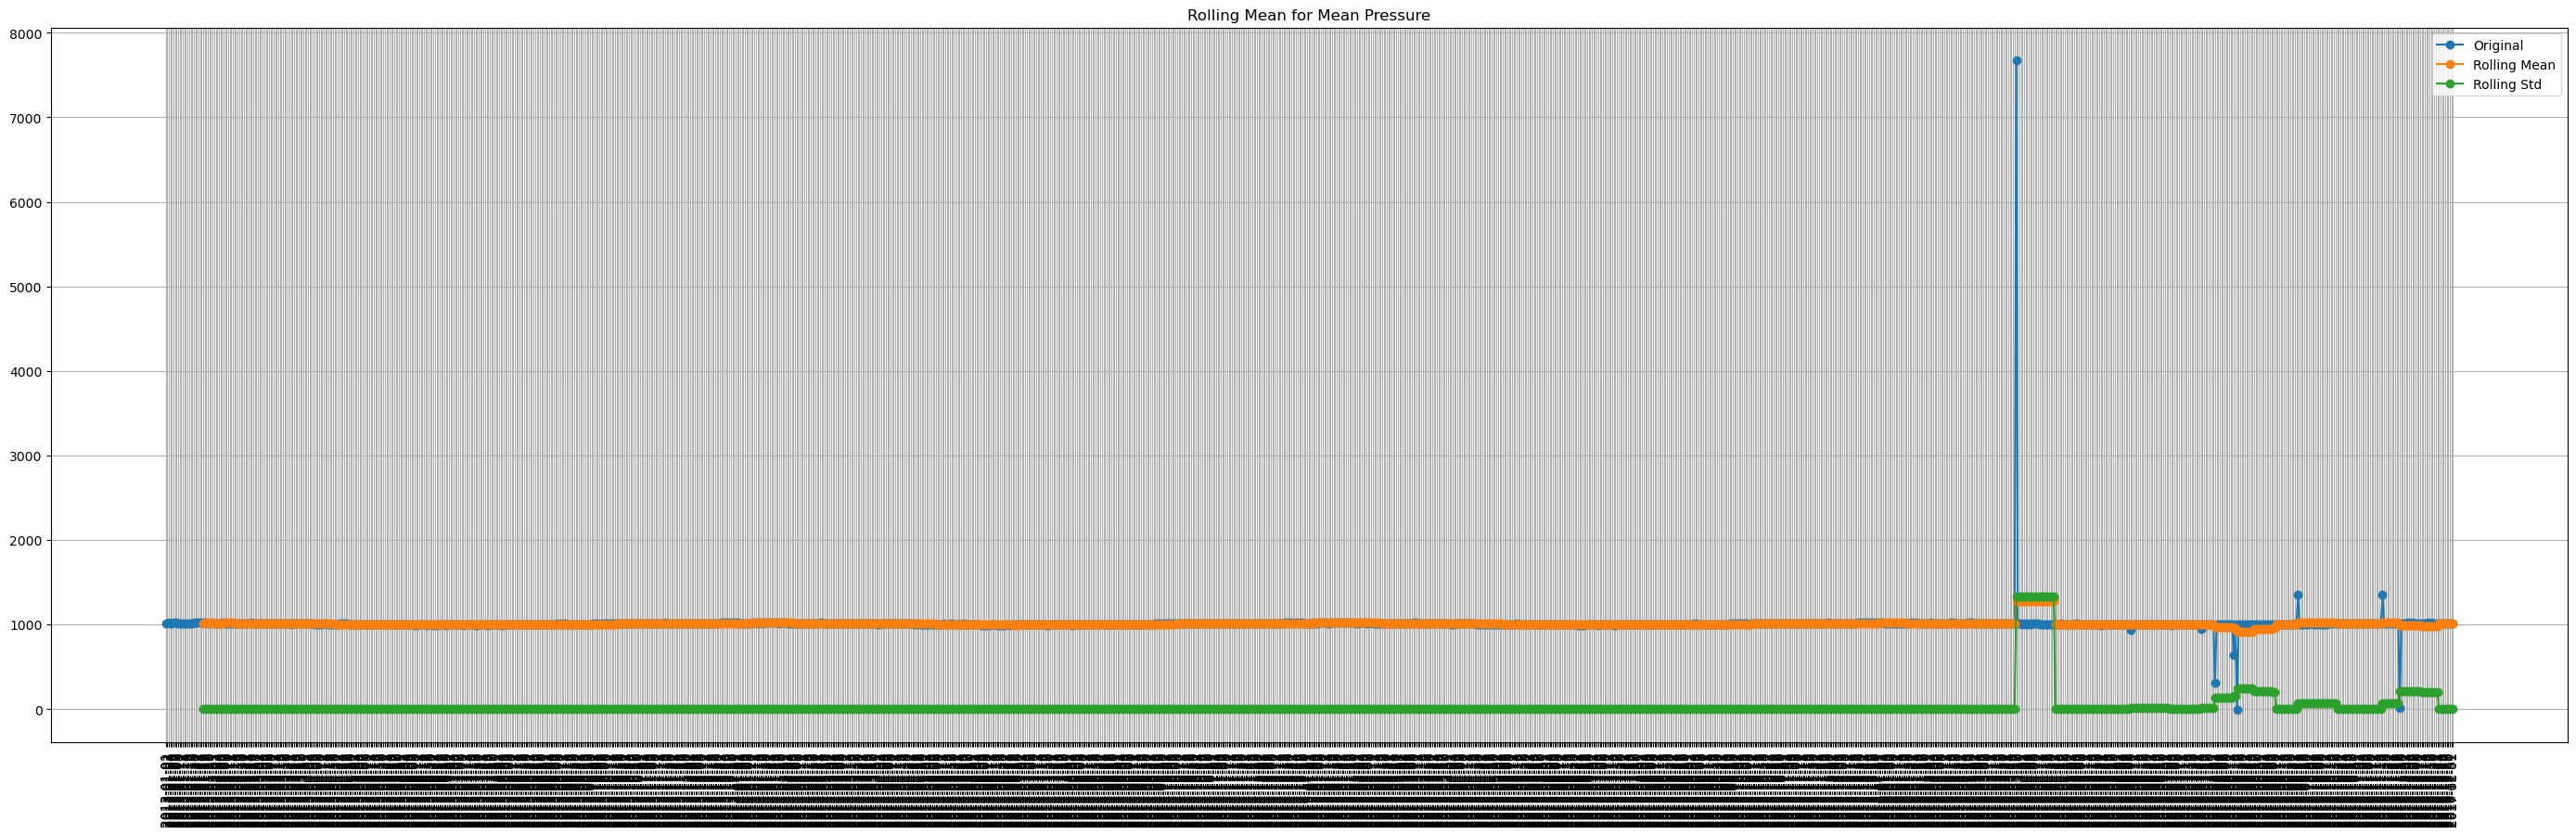

In [17]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['meanpressure'], marker='o', label='Original')
plt.plot(train['date'], train['meanpressure'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['meanpressure'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Pressure")
plt.legend()
plt.show()

it is constant

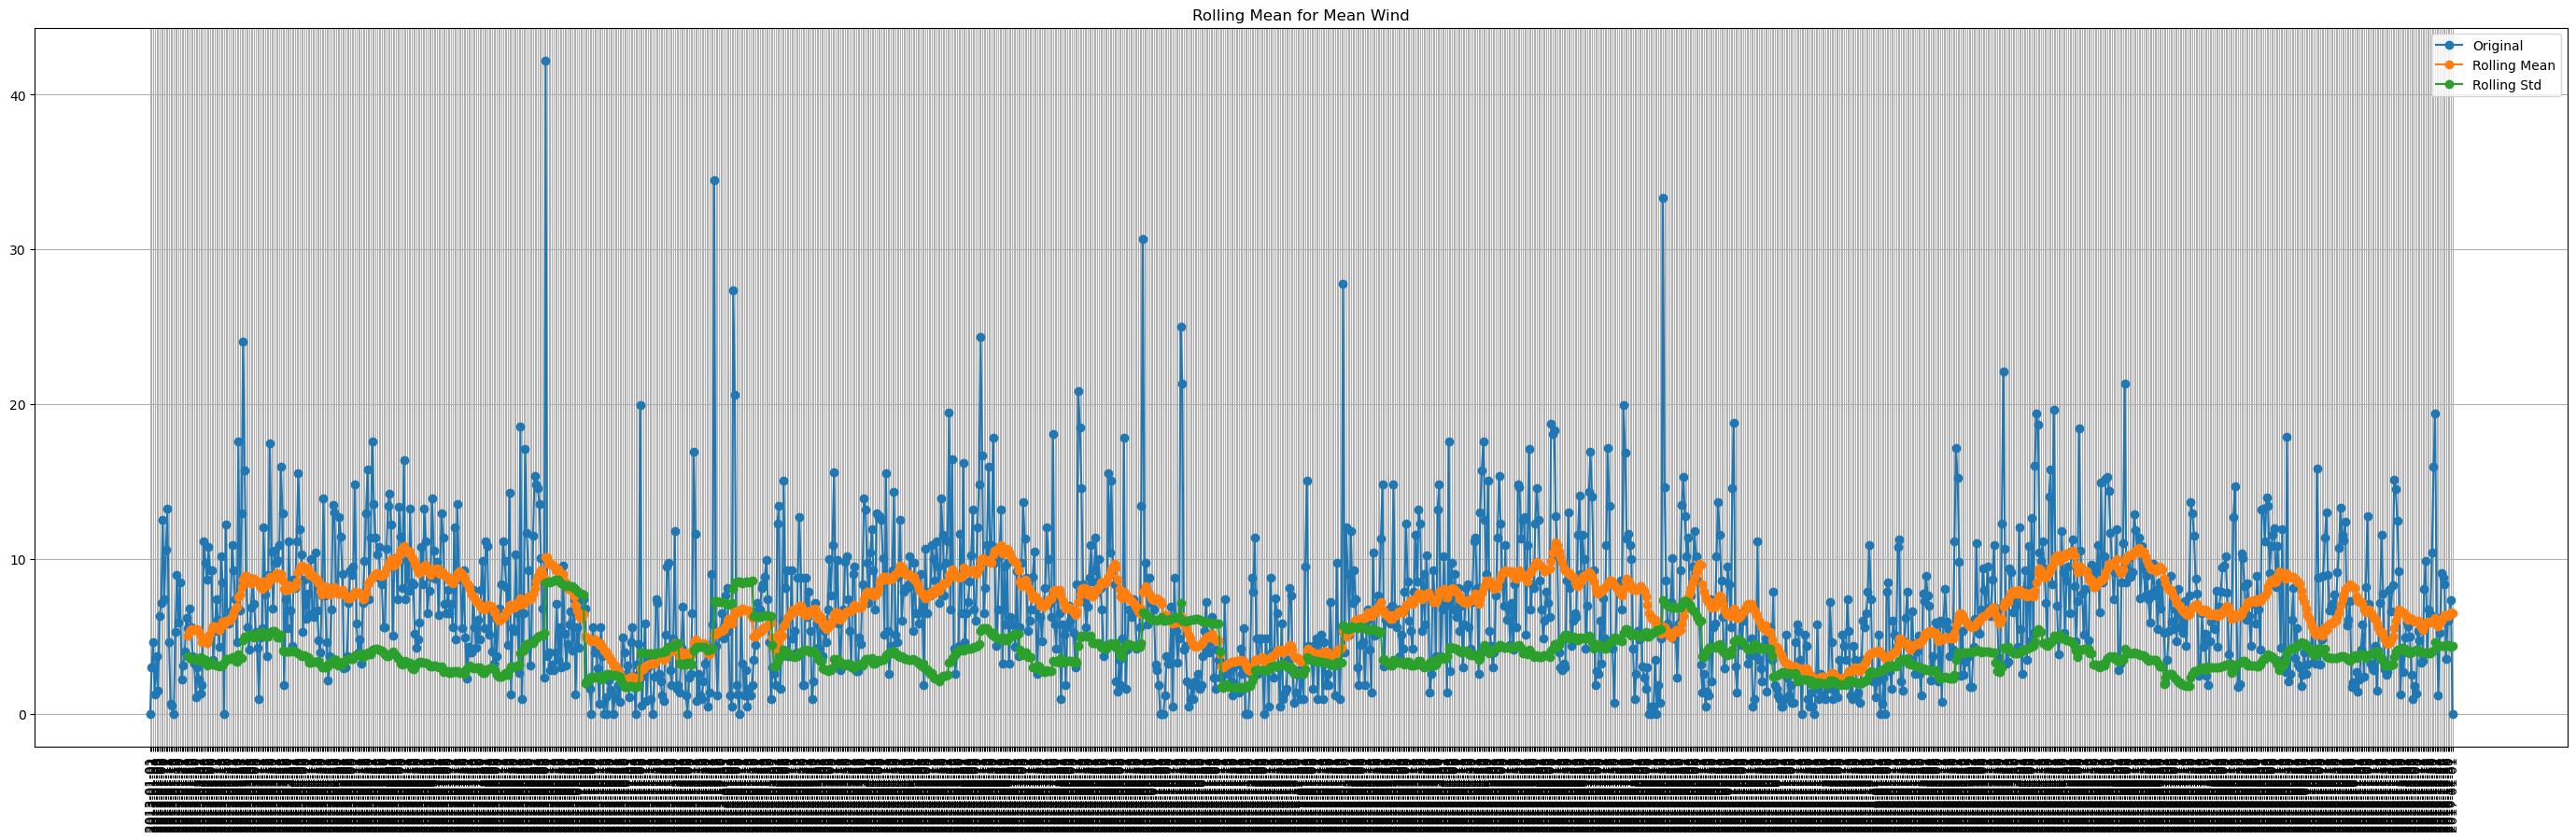

In [18]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['wind_speed'], marker='o', label='Original')
plt.plot(train['date'], train['wind_speed'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['wind_speed'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Wind")
plt.legend()
plt.show()

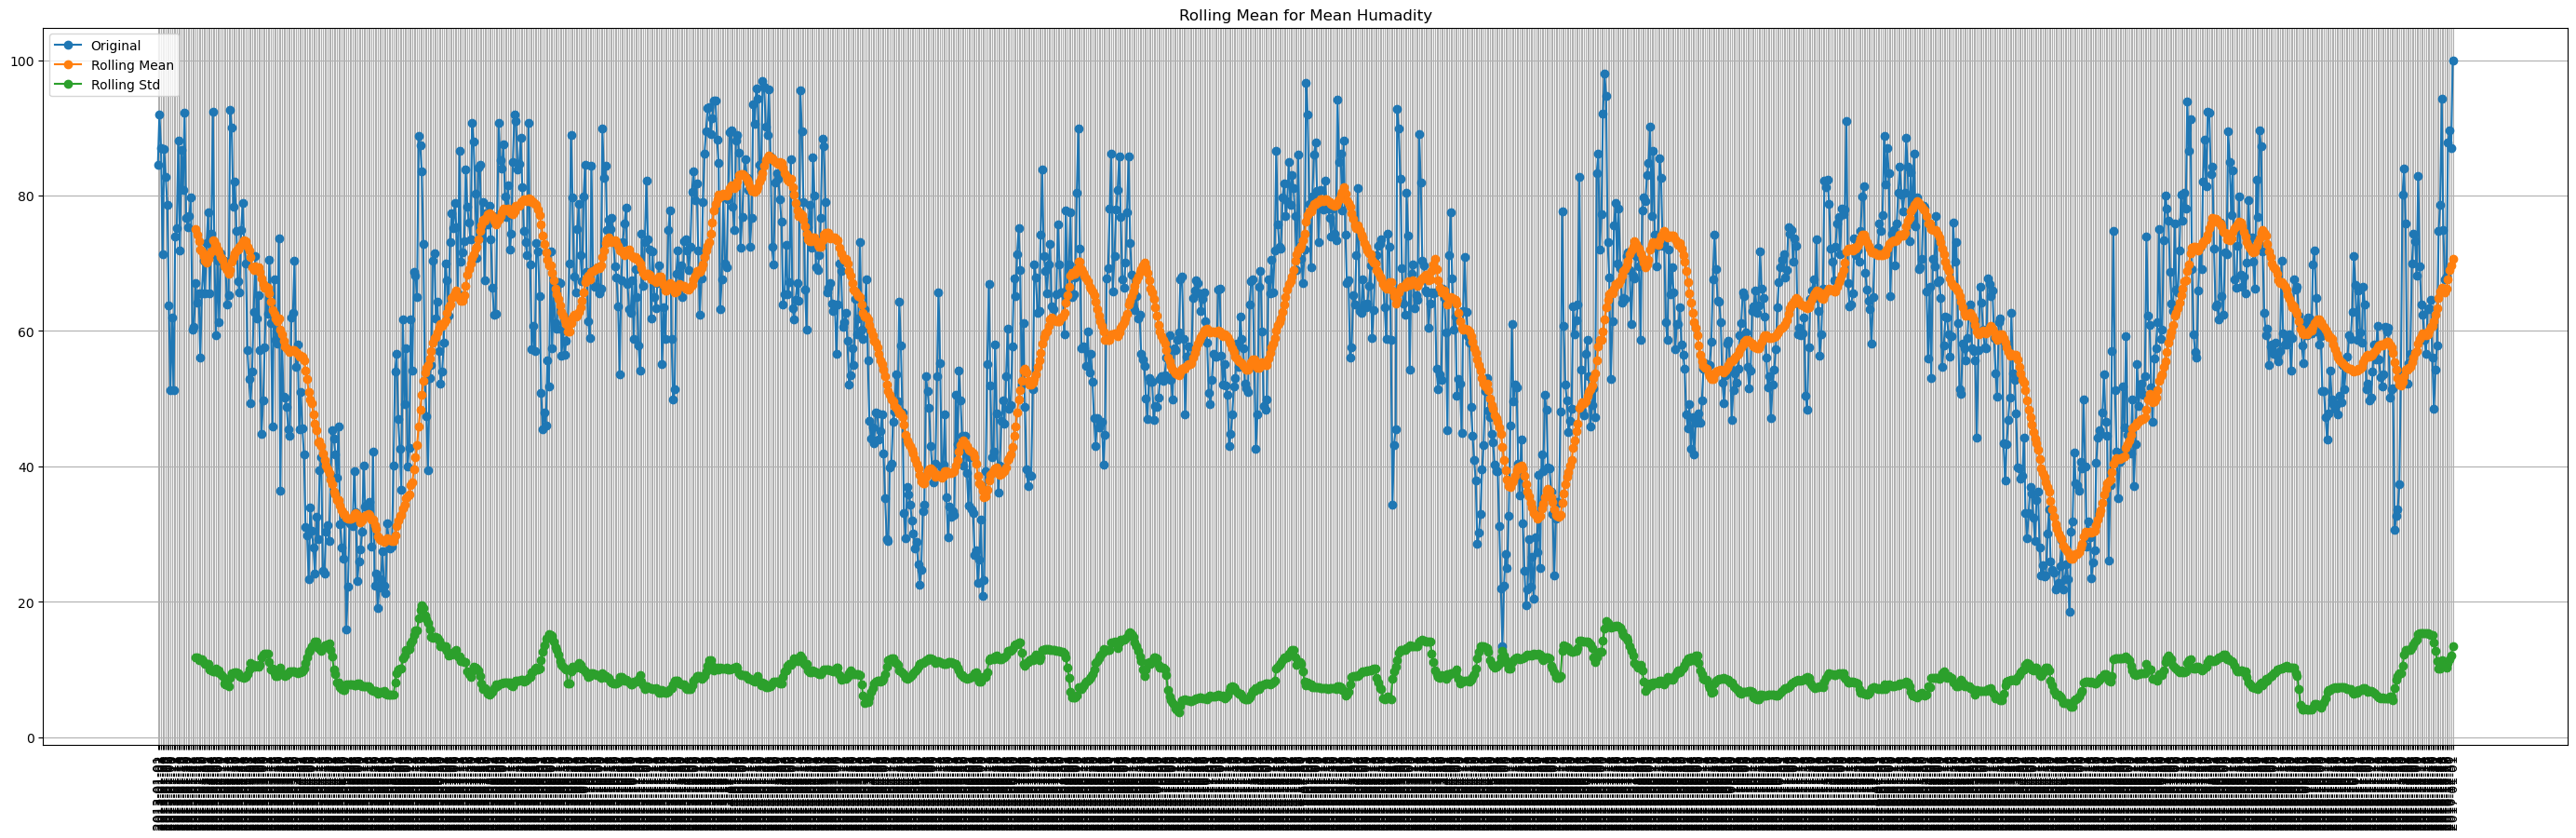

In [19]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['humidity'], marker='o', label='Original')
plt.plot(train['date'], train['humidity'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['humidity'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Humadity")
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [21]:
# ADF Test on each column
for name, column in train.drop(columns='date').iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "meantemp" 
    -----------------------------------------------
ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Non-stationary


    Augmented Dickey-Fuller Test on "humidity" 
    -----------------------------------------------
ADF Statistic: -3.675577
p-value: 0.004470
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "wind_speed" 
    -----------------------------------------------
ADF Statistic: -3.838097
p-value: 0.002541
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "meanpressure" 
    -----------------------------------------------
ADF Statistic: -38.078590
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary




C:\Users\Ramez\AppData\Local\Temp\ipykernel_18312\3149982368.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in train.drop(columns='date').iteritems():


In [22]:
# ADF Test on each column
for name, column in train.drop(columns='date').diff().dropna().iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "meantemp" 
    -----------------------------------------------
ADF Statistic: -16.378720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "humidity" 
    -----------------------------------------------
ADF Statistic: -12.683532
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "wind_speed" 
    -----------------------------------------------
ADF Statistic: -12.837720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "meanpressure" 
    -----------------------------------------------
ADF Statistic: -12.945640
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary




C:\Users\Ramez\AppData\Local\Temp\ipykernel_18312\1232308683.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in train.drop(columns='date').diff().dropna().iteritems():


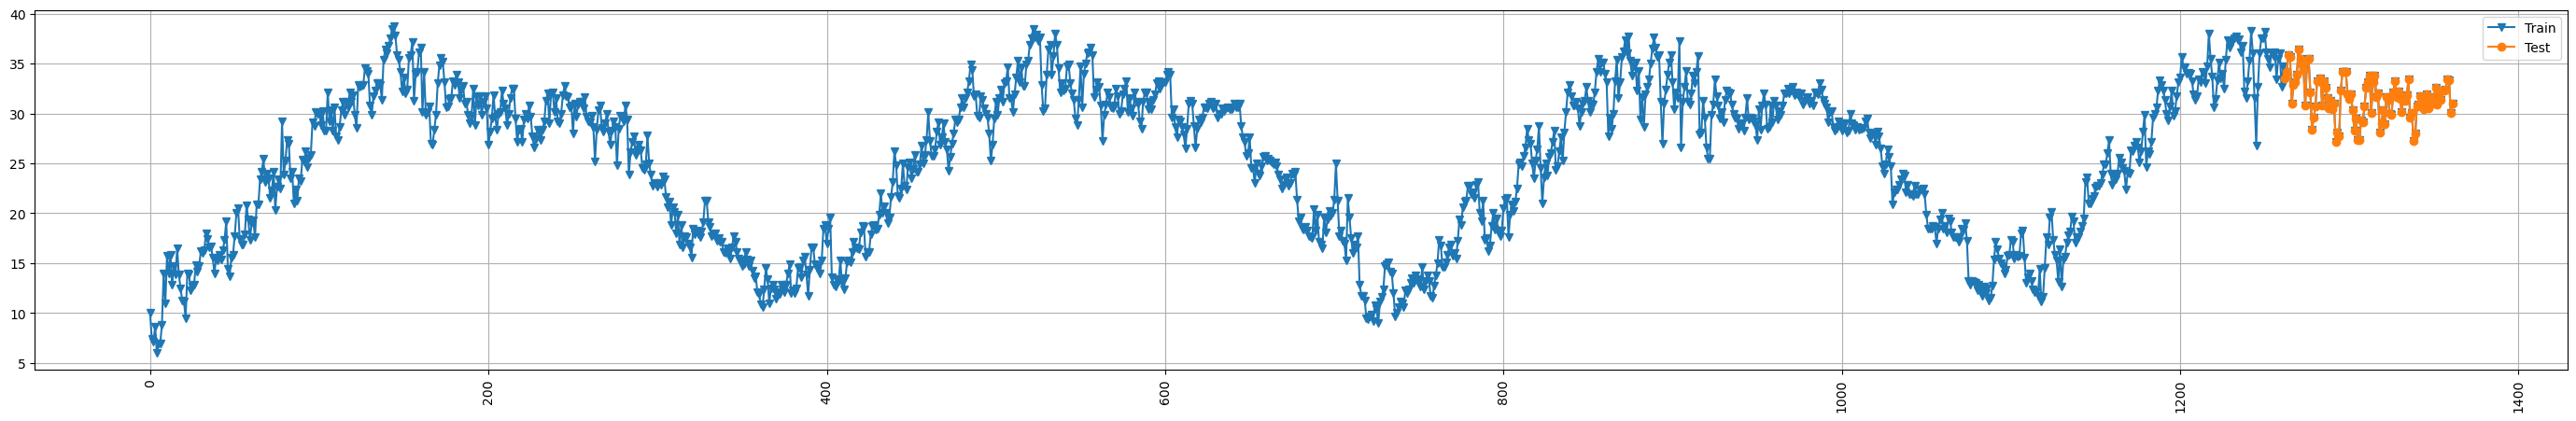

In [23]:
train=train[:-100]
test=train[-100:]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['meantemp'], marker='v', label='Train')
plt.plot( test['meantemp'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

We'll fit Auto-ARIMA with this dataset.

And will compare the result with test part inorder to compare it.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=inf, Time=10.10 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=5457.135, Time=0.62 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=5182.315, Time=0.86 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=3.42 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=5181.505, Time=0.41 sec
 ARIMA(1,2,0)(0,0,1)[4]             : AIC=5182.246, Time=1.29 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=5184.182, Time=1.25 sec
 ARIMA(2,2,0)(0,0,0)[4]             : AIC=5065.073, Time=0.78 sec
 ARIMA(2,2,0)(1,0,0)[4]             : AIC=5067.061, Time=1.37 sec
 ARIMA(2,2,0)(0,0,1)[4]             : AIC=5067.040, Time=1.44 sec
 ARIMA(2,2,0)(1,0,1)[4]             : AIC=5068.947, Time=1.91 sec
 ARIMA(3,2,0)(0,0,0)[4]             : AIC=4918.194, Time=0.56 sec
 ARIMA(3,2,0)(1,0,0)[4]             : AIC=4777.560, Time=3.98 sec
 ARIMA(3,2,0)(2,0,0)[4]             : AIC=4690.465, Time=5.82 sec
 ARIMA(3,2,0)(2,0,1)[4]             : AIC=

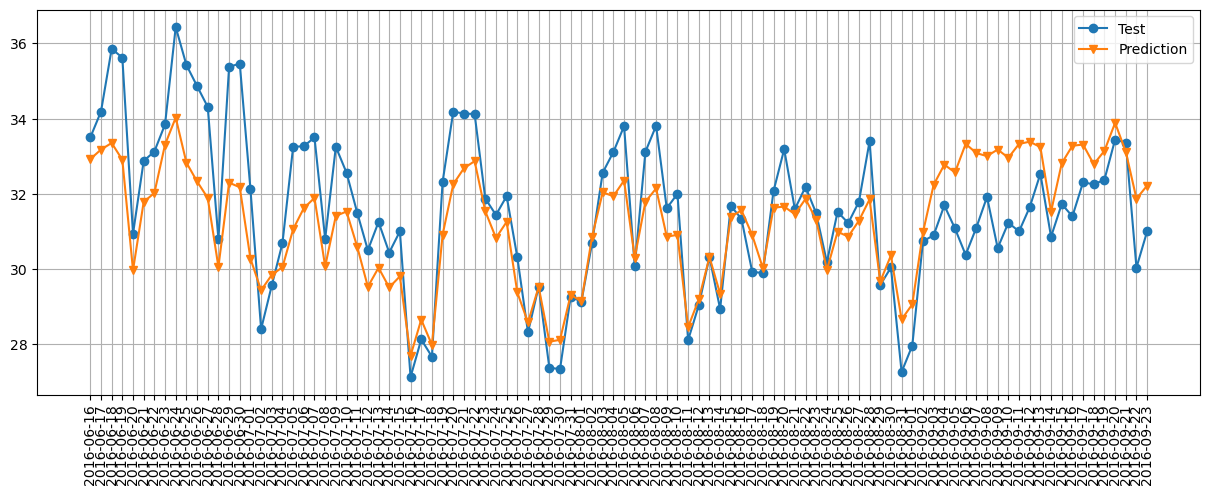

Mean Absolute Percentage Error 0.032899966230059176
Mean Squared Error 1.7375947699301568
RMSE 1.318178580439751
AIC values 4690.465327776785


,Test,Prediction,Difference,% Chnage
0,33.500000,32.923462,0.576538,1.721010
1,34.187500,33.176771,1.010729,2.956430
2,35.857143,33.352417,2.504725,6.985290
3,35.625000,32.905357,2.719643,7.634084
4,30.937500,29.967038,0.970462,3.136847
...,...,...,...,...
95,32.375000,33.143753,-0.768753,2.374526
96,33.444444,33.887797,-0.443353,1.325640
97,33.360000,33.121752,0.238248,0.714171
98,30.037037,31.871504,-1.834467,6.107349


In [24]:
# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(train['meantemp'],X=train.drop(columns=['date','meantemp']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100, X=test.drop(columns=['date','meantemp']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['date'][-100:],test['meantemp'], marker='o', label='Test')
plt.plot(train['date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['meantemp'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)

a=pd.DataFrame(test['meantemp'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['meantemp']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output